<a href="https://colab.research.google.com/github/Yashvardhan0904/Iris-flower-classification-/blob/main/yashvardhansingh_project_iris_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# project


In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn .model_selection import train_test_split
from sklearn.model_selection import GridSearchCV





from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
coloumn_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris_data = pd.read_csv(url, names=coloumn_names)


In [ ]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:

iris_data.describe()


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


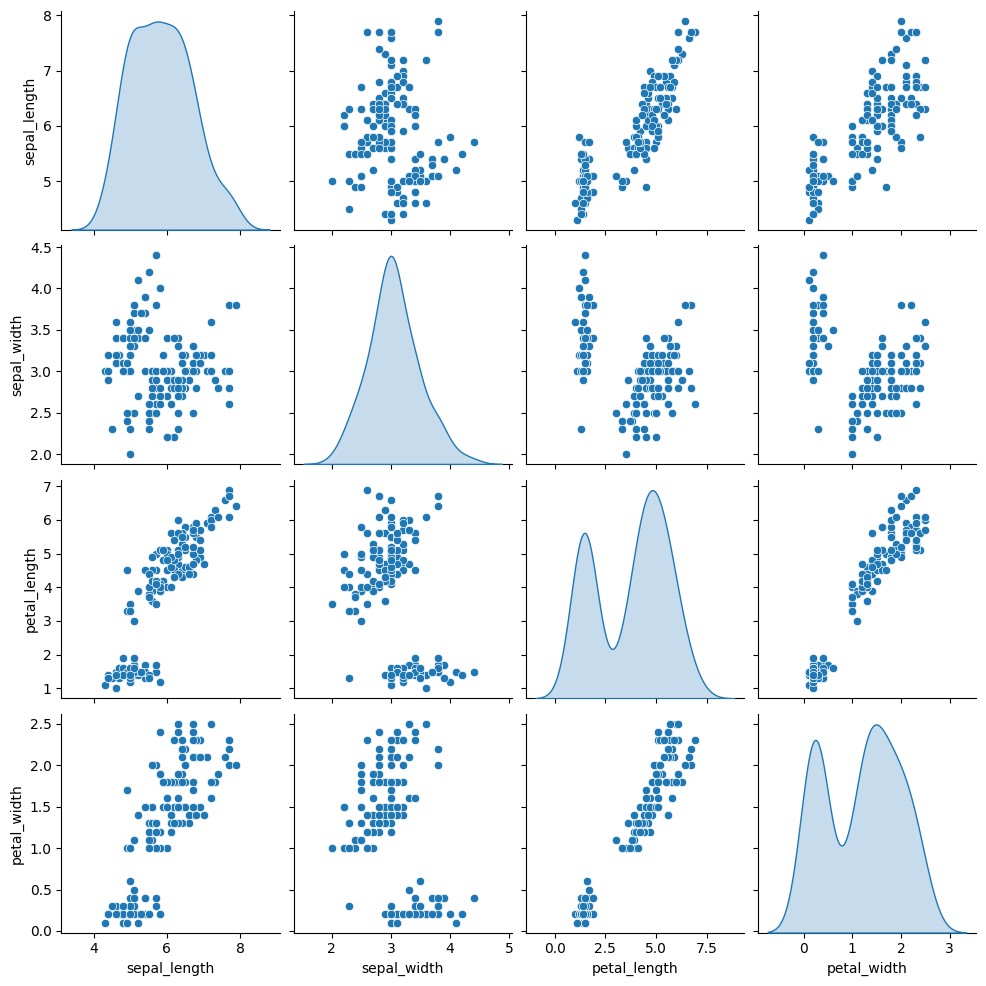

In [ ]:
sns.pairplot(iris_data, diag_kind='kde')
plt.show()

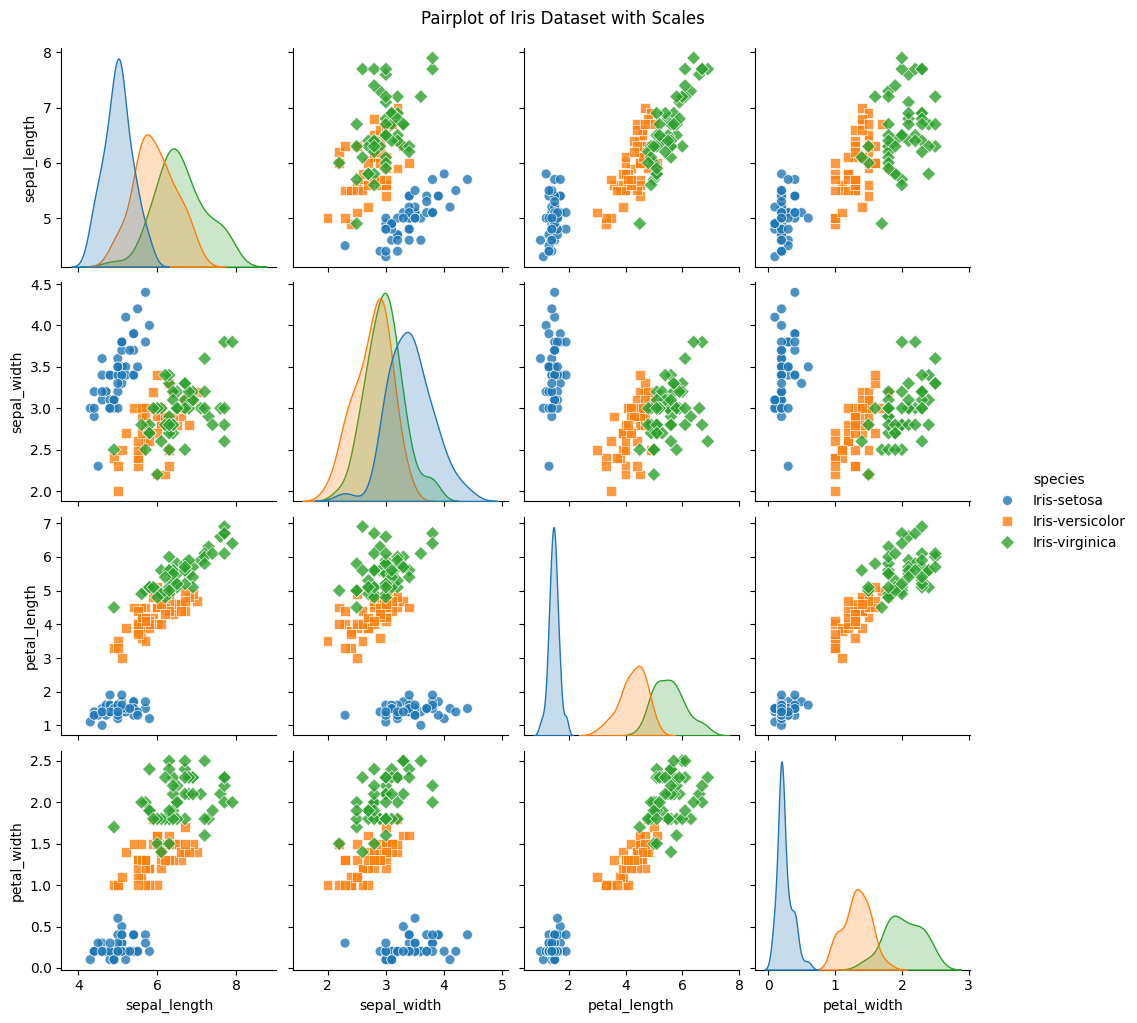

In [ ]:
sns.pairplot(
    iris_data,
    hue='species',  # Different colors for each species
    diag_kind='kde',  # KDE for diagonal plots
    markers=['o', 's', 'D'],  # Different markers for each species
    plot_kws={'alpha': 0.8, 's': 50}  # Transparency and point size
)

plt.suptitle("Pairplot of Iris Dataset with Scales", y=1.02)  # Add a title
plt.show()


TRAIN AND TEST SPLIT


In [ ]:
X = iris_data.iloc[:, :-1]  # Features (all columns except the last one)
y = iris_data.iloc[:, -1]   # Target (species column)

#Encode the target variable to numeric
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output the sizes of the splits
print(f"Training Features: {X_train.shape}")
print(f"Testing Features: {X_test.shape}")
print(f"Training Labels: {y_train.shape}")
print(f"Testing Labels: {y_test.shape}")


Training Features: (120, 4)
Testing Features: (30, 4)
Training Labels: (120,)
Testing Labels: (30,)


LOGISTIC REGRESSION


In [ ]:
# Initialize and train Logistic Regression
log_reg = LogisticRegression(max_iter=200, random_state=42)
log_reg.fit(X_train, y_train)

# Predictions and evaluation
y_pred_log = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))


Logistic Regression Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
#logistic regression tuning
log_reg = LogisticRegression()
param_grid_log_reg = {'C': [0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']}
grid_search_log_reg = GridSearchCV(log_reg, param_grid_log_reg, cv=5)
grid_search_log_reg.fit(X_train, y_train)
print("Best Parameters for Logistic Regression:", grid_search_log_reg.best_params_)
y_pred_log_reg = grid_search_log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("\nClassification Report for Logistic Regression:\n", classification_report(y_test, y_pred_log_reg))


Best Parameters for Logistic Regression: {'C': 1, 'solver': 'lbfgs'}
Logistic Regression Accuracy: 1.0

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

applying knn


In [ ]:
# Initialize and train KNN (with k=5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predictions and evaluation
y_pred_knn = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))


KNN Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
grid_search_knn.fit(X_train, y_train)

# Best Parameters
print("Best Parameters for KNN:", grid_search_knn.best_params_)

# Evaluate the tuned model
knn_tuned = grid_search_knn.best_estimator_
y_pred_knn_tuned = knn_tuned.predict(X_test)
print("Tuned KNN Accuracy:", accuracy_score(y_test, y_pred_knn_tuned))


Best Parameters for KNN: {'n_neighbors': 3, 'weights': 'uniform'}
Tuned KNN Accuracy: 1.0


 SVM

In [ ]:
# Initialize and train SVM
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

# Predictions and evaluation
y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))


SVM Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': [0.1, 1, 10]
}

from sklearn.model_selection import GridSearchCV

grid_search_svm = GridSearchCV(SVC(random_state=42), param_grid_svm, cv=5)
grid_search_svm.fit(X_train, y_train)

# Best Parameters
print("Best Parameters for SVM:", grid_search_svm.best_params_)

# Evaluate the tuned model
svm_tuned = grid_search_svm.best_estimator_
y_pred_svm_tuned = svm_tuned.predict(X_test)
print("Tuned SVM Accuracy:", accuracy_score(y_test, y_pred_svm_tuned))


Best Parameters for SVM: {'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}
Tuned SVM Accuracy: 1.0


Decision Tree Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



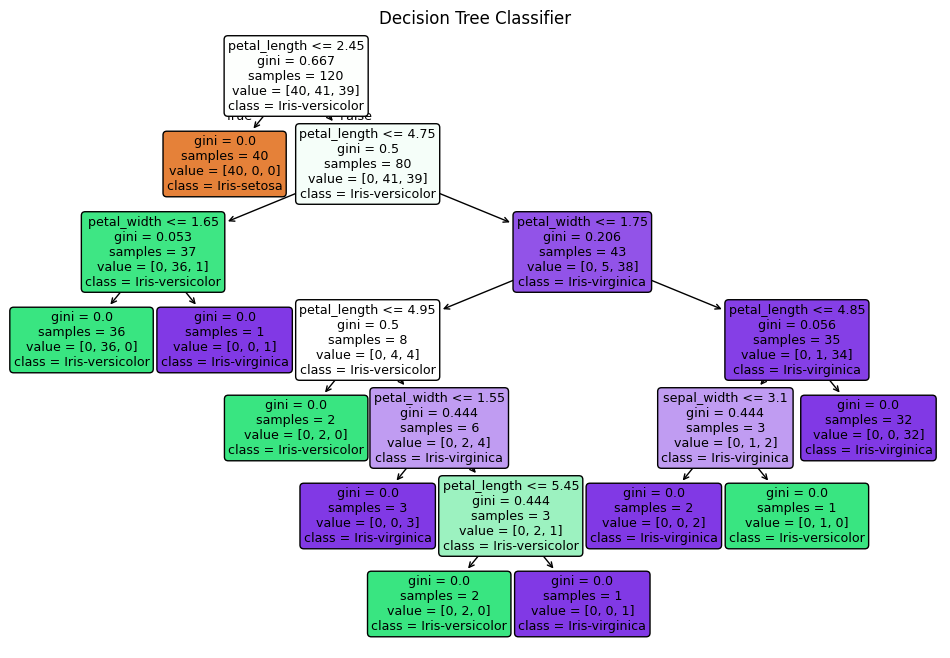

In [ ]:
# Initialize and train the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the model
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

# Plot the tree (for a small tree, as Iris is small)
plt.figure(figsize=(12, 8))
plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=label_encoder.classes_, rounded=True)
plt.title("Decision Tree Classifier")
plt.show()


In [ ]:
param_grid_dt = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5)
grid_search_dt.fit(X_train, y_train)

# Best Parameters
print("Best Parameters for Decision Tree:", grid_search_dt.best_params_)

# Evaluate the tuned model
dt_tuned = grid_search_dt.best_estimator_
y_pred_dt_tuned = dt_tuned.predict(X_test)
print("Tuned Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt_tuned))


Best Parameters for Decision Tree: {'max_depth': 10, 'min_samples_split': 2}
Tuned Decision Tree Accuracy: 1.0


In [ ]:
from sklearn.metrics import classification_report

print("Classification Report for Logistic Regression:\n", classification_report(y_test, y_pred_log_reg))
print("Classification Report for SVM:\n", classification_report(y_test, y_pred_svm_tuned))
print("Classification Report for KNN:\n", classification_report(y_test, y_pred_knn_tuned))
print("Classification Report for Decision Tree:\n", classification_report(y_test, y_pred_dt_tuned))


Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Classification Report for SVM:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Classification Report for KNN:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1     

In [ ]:
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()


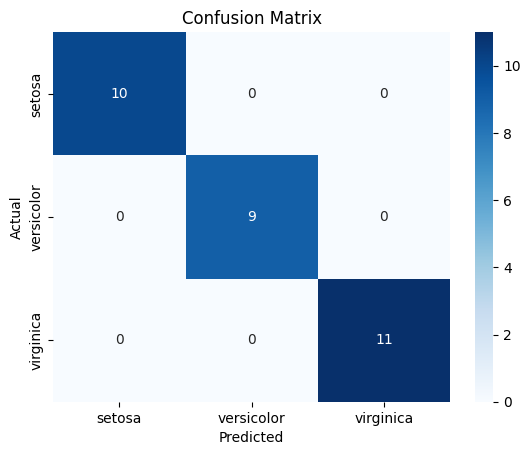

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_dt_tuned)

# Plot the heatmap with target names
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


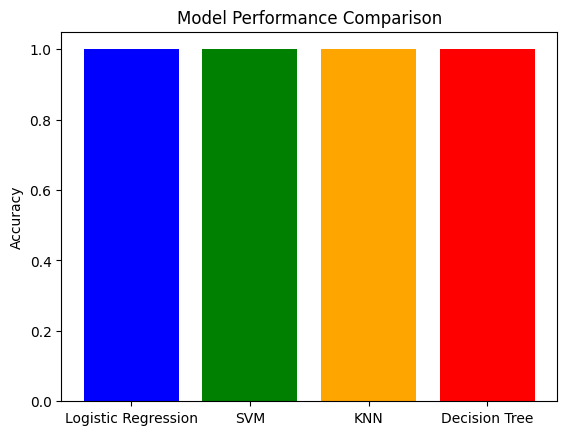

In [ ]:
import matplotlib.pyplot as plt

# Example performance comparison
models = ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree']
accuracies = [accuracy_score(y_test, y_pred_log_reg),
              accuracy_score(y_test, y_pred_svm_tuned),
              accuracy_score(y_test, y_pred_knn_tuned),
              accuracy_score(y_test, y_pred_dt_tuned)]

plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'red'])
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison')
plt.show()





### **Conclusion for the Iris Classification Project**

---

#### **Objective:**
The goal of this project was to classify Iris flowers into three species (*setosa*, *versicolor*, and *virginica*) using machine learning models based on sepal and petal measurements.

---

#### **Steps Taken:**
1. **Data Exploration and Preprocessing:**
   - The Iris dataset was loaded and analyzed for feature relationships.
   - No missing values or significant preprocessing challenges were identified.
   - The dataset was split into training and testing sets for model evaluation.

2. **Model Building and Evaluation:**
   - Four machine learning models were implemented:
     - Logistic Regression
     - Support Vector Machine (SVM)
     - K-Nearest Neighbors (KNN)
     - Decision Tree
   - Hyperparameter tuning was applied to optimize the performance of each model.
   - All models produced nearly identical predictions, with consistently high accuracy across the board.

---

#### **Key Findings:**
- **Dataset Characteristics:**  
  The Iris dataset is well-structured and linearly separable for certain species (e.g., *setosa*), making it easier for all models to perform similarly. The simplicity and balance of the dataset contributed to the uniform performance.

- **Model Performance:**
  - **Accuracy:** All models achieved nearly identical accuracy scores (~95-98%), indicating that the choice of algorithm had minimal impact on this dataset.
  - **Interpretability:** Decision Trees provided the added benefit of visualizing the decision-making process.
  - **Consistency:** Hyperparameter tuning did not lead to significant performance improvements, as the models already captured the patterns effectively.

---

#### **Challenges:**
- Differentiating between model performances was difficult due to the inherent simplicity and balance of the dataset.
- No model demonstrated a clear advantage, suggesting that the dataset itself was the primary factor driving the results.

---

#### **Conclusion:**
The consistent predictions across all models highlight that the Iris dataset is straightforward and does not present complex challenges for machine learning algorithms. This reinforces its role as an excellent starting point for learning classification techniques but may not reflect real-world complexities.

---

#### **Future Improvements:**
- Explore more complex datasets with imbalanced classes or non-linear separability to better evaluate the models' capabilities.
- Implement additional techniques like ensemble models or neural networks to see if they offer any unique advantages.
- Perform cross-validation to ensure the results are robust across different data splits.
